# A tutorial on statistical-learning for scientific data processing

https://scikit-learn.org/stable/tutorial/statistical_inference/index.html

In [1]:
from sklearn import datasets
iris = datasets.load_iris()
data = iris.data
data.shape

(150, 4)

In [2]:
digits = datasets.load_digits()
digits.images.shape

(1797, 8, 8)

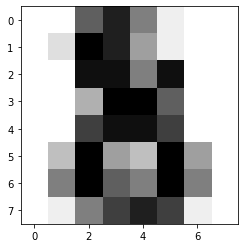

In [3]:
import matplotlib.pyplot as plt
plt.imshow(digits.images[-1],
          cmap=plt.cm.gray_r)

In [4]:
data = digits.images.reshape(
    (digits.images.shape[0], -1)
)

In [5]:
import numpy as np
from sklearn import datasets
iris_X, iris_y = datasets.load_iris(return_X_y=True)
np.unique(iris_y)

array([0, 1, 2])

In [6]:
np.random.seed(0)


In [7]:
indices = np.random.permutation(len(iris_X))

In [8]:
iris_X_train = iris_X[indices[:-10]]

In [9]:
iris_y_train = iris_y[indices[:-10]]

In [10]:
iris_X_test = iris_X[indices[-10:]]

In [11]:
iris_y_test = iris_y[indices[-10:]]

In [12]:
from sklearn.neighbors import KNeighborsClassifier

In [13]:
knn = KNeighborsClassifier()

In [14]:
knn.fit(iris_X_train, iris_y_train)

KNeighborsClassifier()

In [15]:
knn.predict(iris_X_test)

array([1, 2, 1, 0, 0, 0, 2, 1, 2, 0])

In [16]:
iris_y_test

array([1, 1, 1, 0, 0, 0, 2, 1, 2, 0])

In [17]:
diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True)
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test  = diabetes_X[-20:]
diabetes_y_train = diabetes_y[:-20]
diabetes_y_test  = diabetes_y[-20:]

In [18]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
regr.fit(diabetes_X_train, diabetes_y_train)

LinearRegression()

In [19]:
print(regr.coef_)

[ 3.03499549e-01 -2.37639315e+02  5.10530605e+02  3.27736980e+02
 -8.14131709e+02  4.92814588e+02  1.02848452e+02  1.84606489e+02
  7.43519617e+02  7.60951722e+01]


In [20]:
np.mean((regr.predict(diabetes_X_test) - diabetes_y_test)**2)

2004.5676026898207

In [21]:
regr.score(diabetes_X_test, diabetes_y_test)

0.5850753022690575

In [22]:
X = np.c_[.5,1].T

In [23]:
y = [.5,1]

In [24]:
test = np.c_[0, 1].T

In [25]:
regr = linear_model.LinearRegression()

In [26]:
import matplotlib.pyplot as plt
plt.figure()

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

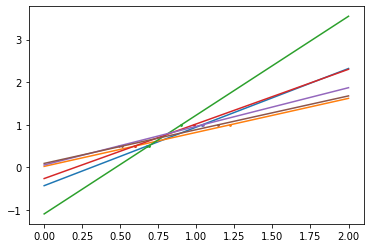

In [27]:
X = np.c_[ .5, 1].T
y = [.5, 1]
test = np.c_[ 0, 2].T
regr = linear_model.LinearRegression()

import matplotlib.pyplot as plt 
plt.figure() 

np.random.seed(0)
for _ in range(6): 
    this_X = .1 * np.random.normal(size=(2, 1)) + X
    regr.fit(this_X, y)
    plt.plot(test, regr.predict(test)) 
    plt.scatter(this_X, y, s=3)  

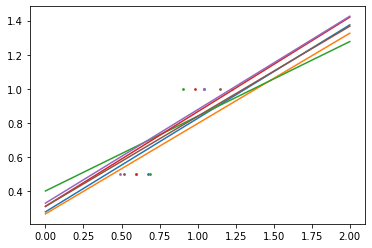

In [28]:
regr = linear_model.Ridge(alpha=.1)

plt.figure() 

np.random.seed(0)
for _ in range(6): 
    this_X = .1 * np.random.normal(size=(2, 1)) + X
    regr.fit(this_X, y)
    plt.plot(test, regr.predict(test)) 
    plt.scatter(this_X, y, s=3) 

In [29]:
alphas = np.logspace(-4, -1, 6)
print([regr.set_params(alpha=alpha)
           .fit(diabetes_X_train, diabetes_y_train)
           .score(diabetes_X_test, diabetes_y_test)
       for alpha in alphas])

[0.5851110683883531, 0.5852073015444674, 0.585467754069849, 0.5855512036503915, 0.5830717085554161, 0.570589994372801]


In [30]:
regr = linear_model.Lasso()

In [31]:
scores = [regr.set_params(alpha=alpha)
         .fit(diabetes_X_train, diabetes_y_train)
          .score(diabetes_X_test, diabetes_y_test)
          for alpha in alphas
         ]


In [32]:
best_alpha = alphas[scores.index(max(scores))]

In [33]:
regr.alpha = best_alpha

In [34]:
regr.fit(diabetes_X_train, diabetes_y_train)

Lasso(alpha=0.025118864315095794)

In [35]:
print(regr.coef_)

[   0.         -212.43764548  517.19478111  313.77959962 -160.8303982
   -0.         -187.19554705   69.38229038  508.66011217   71.84239008]


In [36]:
log = linear_model.LogisticRegression(C=1e5)
log.fit(iris_X_train, iris_y_train)


LogisticRegression(C=100000.0)

Try classifying the digits dataset with nearest neighbors and a linear model. Leave out the last 10% and test prediction performance on these observations.

In [37]:
from sklearn import datasets, neighbors, linear_model

X_digits, y_digits = datasets.load_digits(return_X_y=True)
X_digits = X_digits / X_digits.max()

In [38]:
X_digits

array([[0.    , 0.    , 0.3125, ..., 0.    , 0.    , 0.    ],
       [0.    , 0.    , 0.    , ..., 0.625 , 0.    , 0.    ],
       [0.    , 0.    , 0.    , ..., 1.    , 0.5625, 0.    ],
       ...,
       [0.    , 0.    , 0.0625, ..., 0.375 , 0.    , 0.    ],
       [0.    , 0.    , 0.125 , ..., 0.75  , 0.    , 0.    ],
       [0.    , 0.    , 0.625 , ..., 0.75  , 0.0625, 0.    ]])

In [39]:
n_samples = len(X_digits)

In [40]:
X_train, X_test = X_digits[:int(0.9*n_samples):], X_digits[int(0.9*n_samples):]
y_train, y_test = y_digits[:int(0.9*n_samples):], y_digits[int(0.9*n_samples):]

In [41]:
len(X_train)

1617

In [42]:
len(X_test)

180

In [43]:
len(y_train)

1617

In [44]:
len(y_test)

180

In [45]:
knn = neighbors.KNeighborsClassifier()

In [46]:
logistic = linear_model.LogisticRegression(max_iter=1000)

In [47]:
print(f"KNN Score: {knn.fit(X_train, y_train).score(X_test, y_test)}")

KNN Score: 0.9611111111111111


In [48]:
print(f"LogisticRegression score: {logistic.fit(X_train, y_train).score(X_test, y_test)}")

LogisticRegression score: 0.9333333333333333


In [49]:
from sklearn import svm
svc = svm.SVC(kernel='linear')
svc.fit(iris_X_train, iris_y_train)

SVC(kernel='linear')

In [50]:
svc = svm.SVC(kernel='linear')
svc

SVC(kernel='linear')

In [51]:
svc = svm.SVC(kernel='poly', degree=3)
svc

SVC(kernel='poly')

In [52]:
svc = svm.SVC(kernel='rbf')
svc

SVC()

Exercise

Try classifying classes 1 and 2 from the iris dataset with SVMs, with the 2 first features. Leave out 10% of each class and test prediction performance on these observations.

Warning: the classes are ordered, do not leave out the last 10%, you would be testing on only one class.

Hint: You can use the decision_function method on a grid to get intuitions.

In [53]:
iris = datasets.load_iris()
X = iris.data
y = iris.target

X = X[y != 0, :2]
y = y[y != 0]

In [54]:
from sklearn import model_selection

In [55]:
X_train, X_test = model_selection.train_test_split(X, test_size=0.1)

In [56]:
y_train, y_test = model_selection.train_test_split(y, test_size=0.1)

In [57]:
svc = svm.SVC(kernel='linear', gamma=10)
svc.fit(X_train, y_train).score(X_test, y_test)

0.4


SVM Exercise

A tutorial exercise for using different SVM kernels.

This exercise is used in the :ref:`using_kernels_tut` part of the
:ref:`supervised_learning_tut` section of the :ref:`stat_learn_tut_index`.



<ipython-input-59-c765e84a0ffd>:53: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(XX, YY, Z > 0, cmap=plt.cm.Paired)
<ipython-input-59-c765e84a0ffd>:53: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(XX, YY, Z > 0, cmap=plt.cm.Paired)
<ipython-input-59-c765e84a0ffd>:53: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals

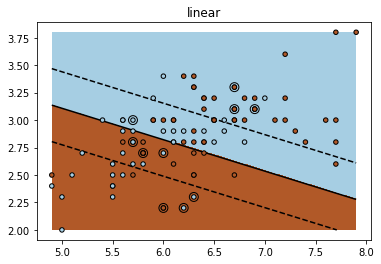

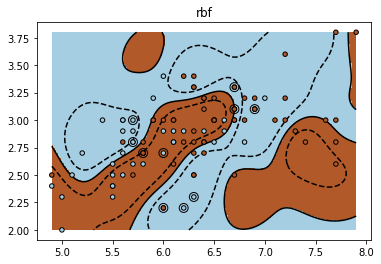

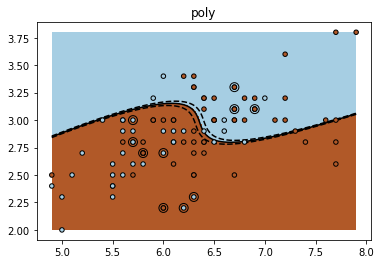

In [59]:
"""
================================
SVM Exercise
================================

A tutorial exercise for using different SVM kernels.

This exercise is used in the :ref:`using_kernels_tut` part of the
:ref:`supervised_learning_tut` section of the :ref:`stat_learn_tut_index`.
"""
print(__doc__)


import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, svm

iris = datasets.load_iris()
X = iris.data
y = iris.target

X = X[y != 0, :2]
y = y[y != 0]

X_train, X_test = model_selection.train_test_split(X, test_size=0.1)
y_train, y_test = model_selection.train_test_split(y, test_size=0.1)

# fit the model
for kernel in ('linear', 'rbf', 'poly'):
    clf = svm.SVC(kernel=kernel, gamma=10)
    clf.fit(X_train, y_train)

    plt.figure()
    plt.clf()
    plt.scatter(X[:, 0], X[:, 1], c=y, zorder=10, cmap=plt.cm.Paired,
                edgecolor='k', s=20)

    # Circle out the test data
    plt.scatter(X_test[:, 0], X_test[:, 1], s=80, facecolors='none',
                zorder=10, edgecolor='k')

    plt.axis('tight')
    x_min = X[:, 0].min()
    x_max = X[:, 0].max()
    y_min = X[:, 1].min()
    y_max = X[:, 1].max()

    XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
    Z = clf.decision_function(np.c_[XX.ravel(), YY.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(XX.shape)
    plt.pcolormesh(XX, YY, Z > 0, cmap=plt.cm.Paired)
    plt.contour(XX, YY, Z, colors=['k', 'k', 'k'],
                linestyles=['--', '-', '--'], levels=[-.5, 0, .5])

    plt.title(kernel)
plt.show()


In [68]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, svm
iris = datasets.load_iris()
X = iris.data
y = iris.target
X = X[y != 0, :2]
y = y[y != 0]

history = {
    'linear': [],
    'poly': [],
    'rbf': []
}

for i in range(10):
    X_train, X_test = model_selection.train_test_split(X, test_size=0.1)
    y_train, y_test = model_selection.train_test_split(y, test_size=0.1)
    for kernel in ('linear', 'poly', 'rbf'):
        clf = svm.SVC(kernel=kernel, gamma=10)
        history[kernel].append(clf.fit(X_train, y_train).score(X_test, y_test))

history

{'linear': [0.2, 0.4, 0.3, 0.4, 0.5, 0.3, 0.5, 0.2, 0.5, 0.6],
 'poly': [0.1, 0.5, 0.3, 0.4, 0.6, 0.5, 0.5, 0.5, 0.4, 0.6],
 'rbf': [0.7, 0.3, 0.3, 0.8, 0.4, 0.6, 0.6, 0.5, 0.4, 0.3]}

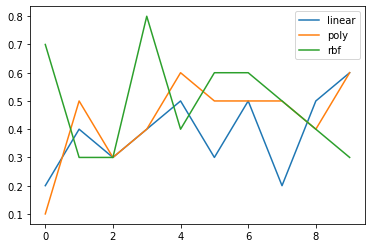

In [77]:
plt.figure()
for kernel in history:
    plt.plot(history[kernel], label=kernel)
    plt.legend()
plt.show()